### Importamos líbrerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [3]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

### Cargamos datos

In [4]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

In [5]:
tipos_datos = {'todos': [X_train, X_test, y_train, y_test],
                'correlados': [X_train_corr, X_test_corr, y_train_corr, y_test_corr]}

### Entrenamos el modelo con varias configuraciones

In [6]:
tip_kernel = ['poly','rbf','sigmoid']

In [7]:
for key in tipos_datos.keys():
    train_set, test_set = func.escala_estandar(train = tipos_datos[key][0], test = tipos_datos[key][1])
    for tipo in tip_kernel:
        svm_reg = SVR(kernel = tipo, gamma = 'auto', C = 10)
        svm_reg.fit(train_set, tipos_datos[key][2])
        print(f'Score para {key} con {tipo} kernel:', metrics.r2_score(tipos_datos[key][3], svm_reg.predict(test_set)))
        

Score para todos con poly kernel: 0.3529461240235271
Score para todos con rbf kernel: 0.8888955035986095
Score para todos con sigmoid kernel: -13428.176934079313
Score para correlados con poly kernel: 0.7604611864497097
Score para correlados con rbf kernel: 0.890550199479134
Score para correlados con sigmoid kernel: -41019.55635770819


### Lo volvemos a entrenar, pero esta vez con la mejor configuración.

In [5]:
X_train_corr_scal, X_test_corr_scal = func.escala_estandar(train = X_train_corr, test = X_test_corr)

In [6]:
svr_reg = SVR(kernel = 'rbf', gamma = 'auto', C = 10)
svr_reg.fit(X_train_corr_scal, y_train_corr)

SVR(C=10, gamma='auto')

In [7]:
svr_pred = svr_reg.predict(X_test_corr_scal)

### Mostramos resultados

In [11]:
func.muestra_metricas(data = y_test, data_pred = svr_pred)

MAE: 0.7354537488563221
MSE: 1.4897864075397893
RMSE: 1.2205680675569837
R2 score: 0.890550199479134


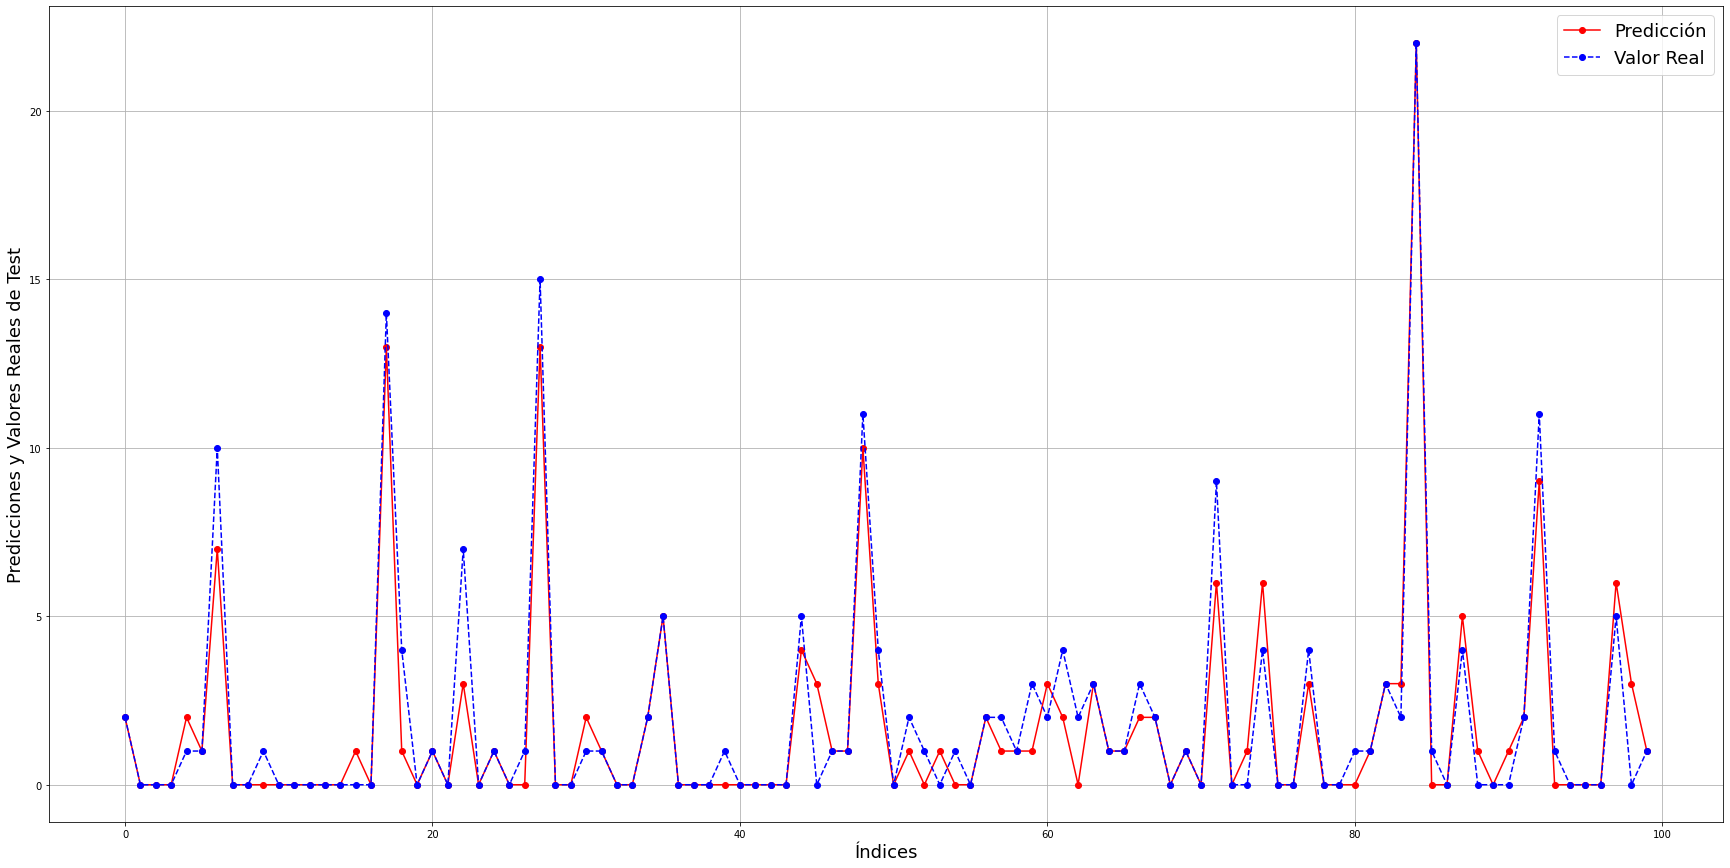

In [12]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(svr_pred,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Prediccion SVR Corr.jpg" )

### Guardamos nuestro modelo

In [13]:
func.guarda_modelo(modelo = svr_reg, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/svm_reg.model")

In [9]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(svr_pred[70:91],0)}
df_prediccion = pd.DataFrame(dict_pred)
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones SVM.csv', sep = ';')
df_prediccion

,Valor Real,Predicción
0,0.0,-0.0
1,9.0,6.0
2,0.0,-0.0
3,0.0,1.0
4,4.0,6.0
5,0.0,0.0
6,0.0,-0.0
7,4.0,3.0
8,0.0,0.0
9,0.0,0.0
